# 1. Importing Libraries and Setting Up Paths
This segment imports necessary libraries, such as TensorFlow and Matplotlib, and sets up the path for the dataset file. It ensures we have all dependencies and data paths configured before proceeding.

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import h5py as h5
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

# Dataset path
dataset_relative_path = 'dataset/random-iter-1/'
datafile = dataset_relative_path + 'datafile1024.h5'

# 2. Data Loading Functions
Defines a function to load data from the H5 file format, commonly used for large datasets. This function retrieves training, validation, and test datasets for use in our model.

In [10]:
def load_data(filepath):
    with h5.File(filepath, 'r') as datafile:
        X_train = np.array(datafile['X_train'])
        Y_train = np.array(datafile['Y_train'])
        X_dev = np.array(datafile['X_dev'])
        Y_dev = np.array(datafile['Y_dev'])
        X_test = np.array(datafile['X_test'])
        Y_test = np.array(datafile['Y_test'])
    return X_train, Y_train, X_dev, Y_dev, X_test, Y_test

# Load the data
X_train, Y_train, X_dev, Y_dev, X_test, Y_test = load_data(datafile)

C:\Users\INTEL\AppData\Local\Temp\ipykernel_10132\1087313279.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  X_train = np.array(datafile['X_train'])
C:\Users\INTEL\AppData\Local\Temp\ipykernel_10132\1087313279.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  Y_train = np.array(datafile['Y_train'])
C:\Users\INTEL\AppData\Local\Temp\ipykernel_10132\1087313279.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  X_dev = np.array(datafile['X_dev'])
C:\Users\INTEL\AppData\Local\Temp\ipykernel_10132\1087313279.py:6: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  Y_dev = np.array(datafile['Y_dev'])
C:\Users\INTEL\AppData\Local\Temp\ipykernel_10132\1087313279.py:7: Depre

# 3. Data Preprocessing
This function reshapes the data to be compatible with the model and normalizes it for improved model performance. Normalization helps speed up convergence during training.

In [11]:
def make_dimensions_compatible(arr):
    return arr.reshape(arr.shape[0], -1, 1)

# Preprocess the data
X_train = make_dimensions_compatible(X_train) / 1000
X_dev = make_dimensions_compatible(X_dev) / 1000
X_test = make_dimensions_compatible(X_test) / 1000

# 4. Defining the CNN Model
Defines the architecture of a custom 1D CNN model with three convolutional layers and two dense layers. The model structure is set up to handle the given input shape and classification task.

In [12]:
class CNNModel(tf.keras.Model):
    def __init__(self, output_classes):
        super(CNNModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv1D(filters=24, kernel_size=5, strides=3, padding='valid')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv1D(filters=16, kernel_size=3, strides=2, padding='valid')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.conv3 = tf.keras.layers.Conv1D(filters=8, kernel_size=3, strides=2, padding='valid')
        self.bn3 = tf.keras.layers.BatchNormalization()
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(20, activation='relu')
        self.dropout1 = tf.keras.layers.Dropout(0.5)
        self.fc2 = tf.keras.layers.Dense(output_classes, activation='softmax')

    def call(self, x, training=False):
        x = self.conv1(x)
        x = self.bn1(x, training=training)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = tf.nn.relu(x)
        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = tf.nn.relu(x)
        x = self.flatten(x)
        print("Shape before dense layer:", x.shape)
        x = self.fc1(x)
        x = self.dropout1(x, training=training)
        return self.fc2(x)

# 5. Compiling and Training the Model
Compiles the model with an optimizer, loss function, and metric, then trains it on the data. Training allows the model to learn patterns in the data, optimizing for accuracy.

In [13]:
def model(X_train, Y_train, X_dev, Y_dev, learning_rate=0.00002, num_epochs=500, minibatch_size=128):
    output_classes = Y_train.shape[1]
    cnn_model = CNNModel(output_classes)
    
    cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    
    history = cnn_model.fit(X_train, Y_train, epochs=num_epochs, batch_size=minibatch_size,
                            validation_data=(X_dev, Y_dev), verbose=1)
    
    return cnn_model, history

# Train the model
cnn_model, history = model(X_train, Y_train, X_dev, Y_dev)

Epoch 1/500
Shape before dense layer: (None, 672)
Shape before dense layer: (None, 672)
88/88 [==============================] - 9s 69ms/step - loss: 1.2366 - accuracy: 0.3972 - val_loss: 1.0742 - val_accuracy: 0.4057
Epoch 2/500
88/88 [==============================] - 4s 51ms/step - loss: 1.1225 - accuracy: 0.4289 - val_loss: 1.0446 - val_accuracy: 0.4057
Epoch 3/500
88/88 [==============================] - 5s 53ms/step - loss: 1.0463 - accuracy: 0.4686 - val_loss: 1.0036 - val_accuracy: 0.4229
Epoch 4/500
88/88 [==============================] - 6s 69ms/step - loss: 1.0012 - accuracy: 0.4914 - val_loss: 0.9443 - val_accuracy: 0.5143
Epoch 5/500
88/88 [==============================] - 6s 67ms/step - loss: 0.9554 - accuracy: 0.5180 - val_loss: 0.8661 - val_accuracy: 0.5943
Epoch 6/500
88/88 [==============================] - 6s 67ms/step - loss: 0.9222 - accuracy: 0.5420 - val_loss: 0.8060 - val_accuracy: 0.6114
Epoch 7/500
88/88 [==============================] - 6s 65ms/step - loss

Epoch 57/500
88/88 [==============================] - 7s 84ms/step - loss: 0.3757 - accuracy: 0.8537 - val_loss: 0.1871 - val_accuracy: 0.9314
Epoch 58/500
88/88 [==============================] - 7s 81ms/step - loss: 0.3631 - accuracy: 0.8627 - val_loss: 0.1849 - val_accuracy: 0.9257
Epoch 59/500
88/88 [==============================] - 9s 103ms/step - loss: 0.3778 - accuracy: 0.8579 - val_loss: 0.1881 - val_accuracy: 0.9200
Epoch 60/500
88/88 [==============================] - 11s 125ms/step - loss: 0.3743 - accuracy: 0.8588 - val_loss: 0.1801 - val_accuracy: 0.9257
Epoch 61/500
88/88 [==============================] - 7s 81ms/step - loss: 0.3592 - accuracy: 0.8645 - val_loss: 0.1775 - val_accuracy: 0.9314
Epoch 62/500
88/88 [==============================] - 6s 65ms/step - loss: 0.3523 - accuracy: 0.8693 - val_loss: 0.1739 - val_accuracy: 0.9257
Epoch 63/500
88/88 [==============================] - 7s 76ms/step - loss: 0.3497 - accuracy: 0.8673 - val_loss: 0.1734 - val_accuracy: 0.9

88/88 [==============================] - 6s 68ms/step - loss: 0.2460 - accuracy: 0.9108 - val_loss: 0.1089 - val_accuracy: 0.9543
Epoch 115/500
88/88 [==============================] - 6s 68ms/step - loss: 0.2442 - accuracy: 0.9132 - val_loss: 0.1029 - val_accuracy: 0.9600
Epoch 116/500
88/88 [==============================] - 7s 76ms/step - loss: 0.2344 - accuracy: 0.9154 - val_loss: 0.1032 - val_accuracy: 0.9543
Epoch 117/500
88/88 [==============================] - 6s 68ms/step - loss: 0.2432 - accuracy: 0.9124 - val_loss: 0.1027 - val_accuracy: 0.9486
Epoch 118/500
88/88 [==============================] - 6s 68ms/step - loss: 0.2435 - accuracy: 0.9150 - val_loss: 0.1021 - val_accuracy: 0.9543
Epoch 119/500
88/88 [==============================] - 6s 66ms/step - loss: 0.2385 - accuracy: 0.9139 - val_loss: 0.1067 - val_accuracy: 0.9543
Epoch 120/500
88/88 [==============================] - 6s 69ms/step - loss: 0.2466 - accuracy: 0.9131 - val_loss: 0.1033 - val_accuracy: 0.9543
Epoch 

Epoch 171/500
88/88 [==============================] - 6s 63ms/step - loss: 0.1952 - accuracy: 0.9292 - val_loss: 0.0793 - val_accuracy: 0.9714
Epoch 172/500
88/88 [==============================] - 5s 62ms/step - loss: 0.1903 - accuracy: 0.9295 - val_loss: 0.0737 - val_accuracy: 0.9829
Epoch 173/500
88/88 [==============================] - 5s 59ms/step - loss: 0.1844 - accuracy: 0.9338 - val_loss: 0.0765 - val_accuracy: 0.9714
Epoch 174/500
88/88 [==============================] - 5s 60ms/step - loss: 0.1882 - accuracy: 0.9320 - val_loss: 0.0773 - val_accuracy: 0.9771
Epoch 175/500
88/88 [==============================] - 5s 57ms/step - loss: 0.1891 - accuracy: 0.9311 - val_loss: 0.0806 - val_accuracy: 0.9771
Epoch 176/500
88/88 [==============================] - 5s 56ms/step - loss: 0.2012 - accuracy: 0.9284 - val_loss: 0.0710 - val_accuracy: 0.9829
Epoch 177/500
88/88 [==============================] - 5s 56ms/step - loss: 0.1956 - accuracy: 0.9295 - val_loss: 0.0829 - val_accuracy:

Epoch 228/500
88/88 [==============================] - 7s 76ms/step - loss: 0.1598 - accuracy: 0.9441 - val_loss: 0.0738 - val_accuracy: 0.9771
Epoch 229/500
88/88 [==============================] - 6s 64ms/step - loss: 0.1683 - accuracy: 0.9402 - val_loss: 0.0605 - val_accuracy: 0.9829
Epoch 230/500
88/88 [==============================] - 7s 81ms/step - loss: 0.1589 - accuracy: 0.9466 - val_loss: 0.0692 - val_accuracy: 0.9771
Epoch 231/500
88/88 [==============================] - 6s 62ms/step - loss: 0.1604 - accuracy: 0.9437 - val_loss: 0.0661 - val_accuracy: 0.9771
Epoch 232/500
88/88 [==============================] - 5s 60ms/step - loss: 0.1566 - accuracy: 0.9456 - val_loss: 0.0658 - val_accuracy: 0.9771
Epoch 233/500
88/88 [==============================] - 6s 63ms/step - loss: 0.1587 - accuracy: 0.9437 - val_loss: 0.0651 - val_accuracy: 0.9771
Epoch 234/500
88/88 [==============================] - 5s 58ms/step - loss: 0.1568 - accuracy: 0.9461 - val_loss: 0.0683 - val_accuracy:

Epoch 285/500
88/88 [==============================] - 5s 54ms/step - loss: 0.1363 - accuracy: 0.9531 - val_loss: 0.0573 - val_accuracy: 0.9829
Epoch 286/500
88/88 [==============================] - 5s 62ms/step - loss: 0.1423 - accuracy: 0.9509 - val_loss: 0.0608 - val_accuracy: 0.9771
Epoch 287/500
88/88 [==============================] - 5s 56ms/step - loss: 0.1411 - accuracy: 0.9511 - val_loss: 0.0586 - val_accuracy: 0.9829
Epoch 288/500
88/88 [==============================] - 5s 58ms/step - loss: 0.1432 - accuracy: 0.9490 - val_loss: 0.0611 - val_accuracy: 0.9771
Epoch 289/500
88/88 [==============================] - 5s 59ms/step - loss: 0.1394 - accuracy: 0.9524 - val_loss: 0.0678 - val_accuracy: 0.9771
Epoch 290/500
88/88 [==============================] - 5s 58ms/step - loss: 0.1387 - accuracy: 0.9524 - val_loss: 0.0565 - val_accuracy: 0.9829
Epoch 291/500
88/88 [==============================] - 5s 55ms/step - loss: 0.1391 - accuracy: 0.9510 - val_loss: 0.0609 - val_accuracy:

Epoch 342/500
88/88 [==============================] - 5s 52ms/step - loss: 0.1305 - accuracy: 0.9567 - val_loss: 0.0767 - val_accuracy: 0.9771
Epoch 343/500
88/88 [==============================] - 5s 60ms/step - loss: 0.1247 - accuracy: 0.9568 - val_loss: 0.0716 - val_accuracy: 0.9771
Epoch 344/500
88/88 [==============================] - 5s 59ms/step - loss: 0.1226 - accuracy: 0.9580 - val_loss: 0.0486 - val_accuracy: 0.9886
Epoch 345/500
88/88 [==============================] - 5s 58ms/step - loss: 0.1249 - accuracy: 0.9564 - val_loss: 0.0543 - val_accuracy: 0.9829
Epoch 346/500
88/88 [==============================] - 5s 55ms/step - loss: 0.1165 - accuracy: 0.9602 - val_loss: 0.0535 - val_accuracy: 0.9829
Epoch 347/500
88/88 [==============================] - 6s 66ms/step - loss: 0.1242 - accuracy: 0.9577 - val_loss: 0.0762 - val_accuracy: 0.9771
Epoch 348/500
88/88 [==============================] - 5s 56ms/step - loss: 0.1252 - accuracy: 0.9542 - val_loss: 0.0692 - val_accuracy:

Epoch 399/500
88/88 [==============================] - 5s 58ms/step - loss: 0.1116 - accuracy: 0.9618 - val_loss: 0.0673 - val_accuracy: 0.9829
Epoch 400/500
88/88 [==============================] - 5s 52ms/step - loss: 0.1127 - accuracy: 0.9604 - val_loss: 0.0501 - val_accuracy: 0.9886
Epoch 401/500
88/88 [==============================] - 4s 51ms/step - loss: 0.1142 - accuracy: 0.9610 - val_loss: 0.0586 - val_accuracy: 0.9829
Epoch 402/500
88/88 [==============================] - 5s 57ms/step - loss: 0.1134 - accuracy: 0.9615 - val_loss: 0.0457 - val_accuracy: 0.9943
Epoch 403/500
88/88 [==============================] - 8s 91ms/step - loss: 0.1167 - accuracy: 0.9596 - val_loss: 0.0494 - val_accuracy: 0.9886
Epoch 404/500
88/88 [==============================] - 8s 95ms/step - loss: 0.1104 - accuracy: 0.9626 - val_loss: 0.0587 - val_accuracy: 0.9829
Epoch 405/500
88/88 [==============================] - 7s 81ms/step - loss: 0.1152 - accuracy: 0.9607 - val_loss: 0.0483 - val_accuracy:

Epoch 456/500
88/88 [==============================] - 8s 89ms/step - loss: 0.1025 - accuracy: 0.9639 - val_loss: 0.0551 - val_accuracy: 0.9829
Epoch 457/500
88/88 [==============================] - 7s 83ms/step - loss: 0.1054 - accuracy: 0.9625 - val_loss: 0.0495 - val_accuracy: 0.9829
Epoch 458/500
88/88 [==============================] - 8s 86ms/step - loss: 0.0989 - accuracy: 0.9641 - val_loss: 0.0604 - val_accuracy: 0.9829
Epoch 459/500
88/88 [==============================] - 8s 85ms/step - loss: 0.1062 - accuracy: 0.9636 - val_loss: 0.0521 - val_accuracy: 0.9829
Epoch 460/500
88/88 [==============================] - 9s 98ms/step - loss: 0.1017 - accuracy: 0.9651 - val_loss: 0.0634 - val_accuracy: 0.9829
Epoch 461/500
88/88 [==============================] - 7s 82ms/step - loss: 0.1040 - accuracy: 0.9638 - val_loss: 0.0607 - val_accuracy: 0.9829
Epoch 462/500
88/88 [==============================] - 9s 101ms/step - loss: 0.1040 - accuracy: 0.9636 - val_loss: 0.0693 - val_accuracy

# 6. Plotting Training and Validation Loss
Plots the training and validation loss to visually assess the model’s performance over epochs. This helps detect potential overfitting or underfitting during training.

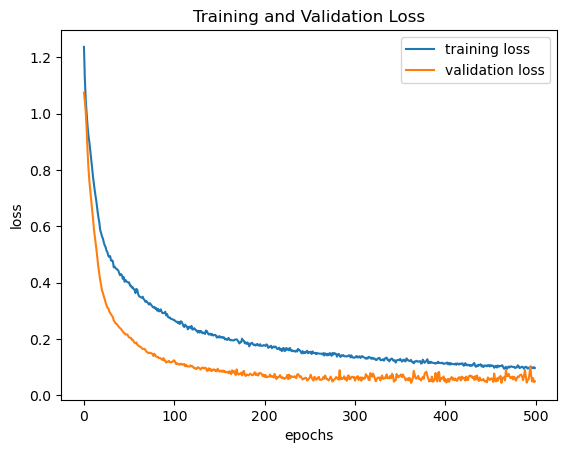

In [14]:
def plot_costs(history):
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

# Plot the costs
plot_costs(history)

# 7. Prediction and Evaluation on Test Data
Makes predictions on the test dataset and evaluates model accuracy. Accuracy is a key metric for classification tasks, measuring the proportion of correct predictions.

In [15]:
def predict(X_test, model):
    y_hat_test = model.predict(X_test)
    return np.argmax(y_hat_test, axis=1)

# Evaluate on test data
y_hat_test = predict(X_test, cnn_model)
print("Predictions shape:", y_hat_test.shape)

# Load the true labels for evaluation
Y_test_labels = np.argmax(Y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(y_hat_test == Y_test_labels)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Shape before dense layer: (None, 672)
6/6 [==============================] - 2s 10ms/step
Predictions shape: (175,)
Test Accuracy: 89.71%


# 8. Comparing Actual and Predicted Values
Displays a few examples of actual vs. predicted values for validation. This quick comparison offers insight into the model’s effectiveness on individual test cases.

In [16]:
def compare_actual_vs_predicted(Y_test_labels, y_hat_test):
    for i in range(10):
        print(f"Actual: {Y_test_labels[i]}, Predicted: {y_hat_test[i]}")

# Compare actual vs predicted
compare_actual_vs_predicted(Y_test_labels, y_hat_test)

Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0


# 9. Confusion Matrix Visualization
Generates a confusion matrix to analyze model performance across all classes. The matrix provides detailed information about where the model makes correct and incorrect predictions.

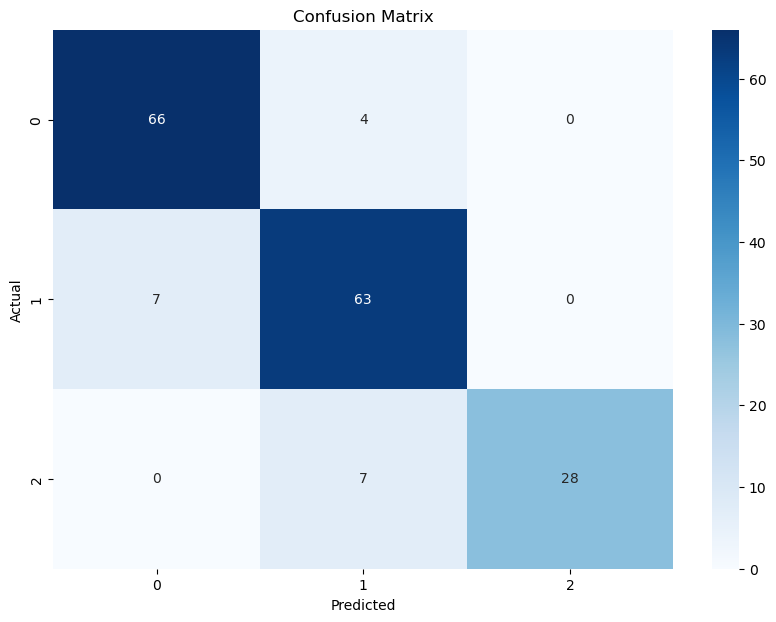

In [17]:
conf_matrix = confusion_matrix(Y_test_labels, y_hat_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test_labels), yticklabels=np.unique(Y_test_labels))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 10. Saving and Loading the Model
Saves the trained model to a specified directory and loads it back for reuse. Saving the model is crucial for deployment and allows further evaluations or predictions.

In [18]:
session_path = 'model_directory/'
os.makedirs(session_path, exist_ok=True)
cnn_model.save(session_path + 'cnn_model', save_format='tf')
print("Model saved in TensorFlow format as 'cnn_model'")

model_path = session_path + 'cnn_model'
if not os.path.exists(model_path):
    print(f"Model path does not exist: {model_path}")
else:
    loaded_model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")

Shape before dense layer: (None, 672)
Shape before dense layer: (None, 672)
Shape before dense layer: (None, 672)
INFO:tensorflow:Assets written to: model_directory/cnn_model\assets


INFO:tensorflow:Assets written to: model_directory/cnn_model\assets


Model saved in TensorFlow format as 'cnn_model'
Model loaded successfully.


# 11. Using the Loaded Model for Predictions
Uses the loaded model to make predictions on test data and calculates accuracy. This verification ensures the saved model’s integrity and accuracy after reloading.

In [19]:
y_hat_test_loaded = predict(X_test, loaded_model)
print("Predictions from loaded model shape:", y_hat_test_loaded.shape)

# Calculate accuracy with the loaded model
accuracy_loaded = np.mean(y_hat_test_loaded == Y_test_labels)
print("Test Accuracy from loaded model: {:.2f}%".format(accuracy_loaded * 100))

6/6 [==============================] - 1s 12ms/step
Predictions from loaded model shape: (175,)
Test Accuracy from loaded model: 89.71%
